In [1]:
import numpy as np
import pandas as pd
from autosklearn.metrics import r2, mean_squared_error
from autosklearn.regression import AutoSklearnRegressor
from sklearn.inspection import plot_partial_dependence, permutation_importance
import matplotlib.pyplot as plt

In [ ]:
def get_metric_result(cv_results):
    results = pd.DataFrame.from_dict(cv_results)
    results = results[results['status'] == "Success"]
    cols = ['rank_test_scores', 'param_classifier:__choice__', 'mean_test_score']
    cols.extend([key for key in cv_results.keys() if key.startswith('metric_')])
    return results[cols]

metrics:

https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
def load_data() -> None:
    pass

In [ ]:
X_train, X_test, y_train, y_test = load_data()

In [ ]:
automl = AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    scoring_functions=[r2, mean_squared_error]
)
automl.fit(X_train, y_train, dataset_name="foo")

https://automl.github.io/auto-sklearn/master/examples/40_advanced/example_get_pipeline_components.html#sphx-glr-examples-40-advanced-example-get-pipeline-components-py

In [ ]:
print(automl.sprint_statistics())

In [ ]:
preds = automl.predict(X_test)
print(get_metric_result(automl.cv_results_).to_string(index=False))

https://automl.github.io/auto-sklearn/master/examples/40_advanced/example_inspect_predictions.html#sphx-glr-examples-40-advanced-example-inspect-predictions-py

https://christophm.github.io/interpretable-ml-book/feature-importance.html

In [ ]:
r = permutation_importance(automl, X_test, y_test, n_repeats=10, random_state=0)
sort_idx = r.importances_mean.argsort()[::-1]

plt.boxplot(r.importances[sort_idx].T,
            labels=[X_train.feature_names[i] for i in sort_idx])

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

for i in sort_idx[::-1]:
    print(f"{X_train.feature_names[i]:10s}: {r.importances_mean[i]:.3f} +/- "
          f"{r.importances_std[i]:.3f}")

In [ ]:
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [12]:
temp = pd.read_csv("temp_zuz.csv", sep=";")
temp["Czas"] = pd.to_datetime(temp["Czas"])
temp = temp.set_index(["Czas"])
temp.head()

,temp_zuz
Czas,
2020-10-01 00:00:00,1297
2020-10-01 01:00:00,1295
2020-10-01 02:00:00,1303
2020-10-01 02:30:00,1302
2020-10-01 03:00:00,1303


In [32]:
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

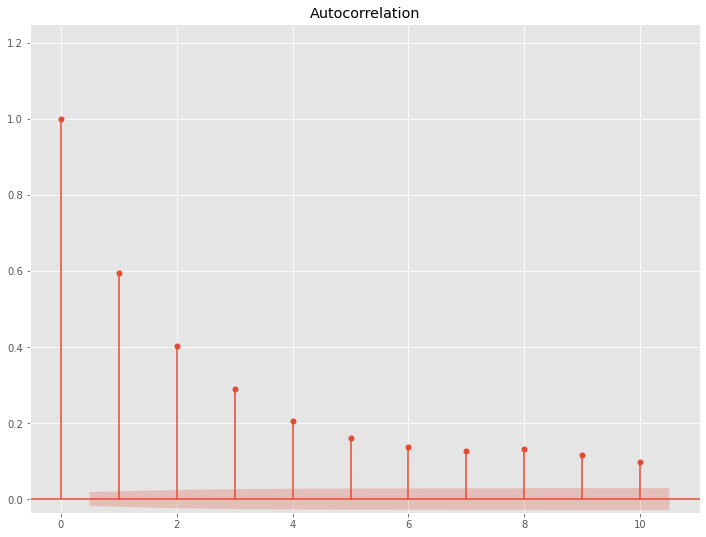

In [44]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(12, 9))
plot_acf(temp, lags=10, auto_ylims=True, ax=ax)
plt.show()